<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Risco_Inadimpl%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito

Com a crise econômica gerada pela pandemia de covid-19, até os grandes bancos brasileiros reforçaram provisões para o caso de calote de clientes, o que influenciou diretamente no lucro destas instituições. 

<center><img alt="real desvalorizado" src="https://thumbs.dreamstime.com/b/c%C3%A9dula-de-derretimento-real-brasileira-do-gotejamento-42780741.jpg" width="50%"> </center>


Sempre que um credor concede crédito a um devedor, há uma chance de que o valor do empréstimo não seja reembolsado. A medida que analisa essa probabilidade é o risco de default. O risco de inadimplência não se aplica apenas a indivíduos que tomam dinheiro emprestado, mas também a empresas que emitem títulos e, devido a restrições financeiras, não podem pagar os juros desses títulos. Sempre que um credor concede crédito, o cálculo do risco de inadimplência de um tomador é crucial como parte de sua estratégia de gerenciamento de risco. Sempre que um investidor está avaliando um investimento, determinar a saúde financeira de uma empresa é crucial para avaliar o risco do investimento.

<center><img alt="Default Risk" src="https://dr5dymrsxhdzh.cloudfront.net/blog/images/ad3043327/2019/05/double-explosure-with-businesss-charts-of-graph-and-rows-of-coins-for-picture-id1051617040.jpg"></center>

Com o rápido aumento na disponibilidade de dados e na capacidade de computação, a área de Machine Learning agora desempenha um papel vital no setor financeiro. Modelos de Machine Learning estão contribuindo significativamente para modelagem de risco de crédito. Grandes bancos e Fintechs têm apostado cada vez mais em modelos de Machine Learning para previnir a inadimplência de alguns clientes.

Neste notebook iremos verificar como um modelo de Machine Learning pode oferecer taxas de precisão significativas na identificação de um cliente que possivelmente não conseguirá cumprir com as suas obrigações.





 
O mercado financeiro tem apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não cumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

### Instalando bibliotecas

Nesse passo iremos instalar as bibliotecas que usaremos nas nossas análises

In [1]:
!pip install biokit;

     |████████████████████████████████| 204kB 2.7MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 225kB 7.2MB/s 
     |████████████████████████████████| 2.3MB 10.7MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 10.0MB 8.9MB/s 
     |████████████████████████████████| 153kB 44.0MB/s 
     |████████████████████████████████| 5.3MB 16.0MB/s 
     |████████████████████████████████| 245kB 26.1MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for biokit: filename=biokit-0.4.6-cp36-none-any.whl size=212703 sha256=6d8a02afa726735ce18b632bced13e782df32c13d603c577864318d8c470649a
  Stored in directory: /root/.cache/pip/wheels/4b/a4/b8/d175a38f46474694964e00f1d6c37335e4cce1b24de74093d2
  Created wheel for easydev: filename=easydev-0.10.1-cp36-none-any.whl size=68367 sha256=6af7e46cf5e94a267c0c6623ab6c2fbeca9d217bff86aa6131c7f573d170b2af
  Stored in directory: /root/.cache

In [2]:
!pip install scikit-plot;

In [3]:
!pip install scikit-optimize;

     |████████████████████████████████| 102kB 2.1MB/s 


## Importando os Dados

Os dados utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [4]:
#importando bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#definindo padrão para o Seaborn
sns.set_style()


In [5]:
link = "http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0"
df = pd.read_csv(link)

## Análise Exploratória dos Dados

Agora com os nossos dados importados para o notebook, vamos inspecioná-lo verificando suas dimensões e estrutura geral dos dados

In [6]:
#dimensões do dataset
print("Entradas ou linhas: {}".format(df.shape[0]))
print("Colunas ou variáveis: {}".format(df.shape[1]))

Entradas ou linhas: 45000
Colunas ou variáveis: 43


Nosso dataset possui 45.000 linhas e 43 variáveis distintas.

No próximo passo vamos observar as 5 primeiras linhas para facilitar a visualização adiante:

In [7]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [8]:
print(list(df))

['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud']


### Observações Iniciais

- A coluna `ids` é anônima e representa o identificador único do cliente. Normalmente essa coluna não influência no modelo de machine learning.

- A coluna `target_default`é o nosso **alvo**. Essa coluna representa no dataset se o cliente cumpriu ou não com as obrigações junto a instituição financeira.

- As colunas `score_1` e `score_2` estão codificadas de alguma forma.  As colunas `score_3`, `score_4`, `score_5` e `score_6` são numéricas. Essas variáveis classificam o cliente quanto a pontuação de crédito e iremos verificar a quantidade de códigos para analisar a sua transformação para categorias.

- existem outras variáveis que apresentam algum tipo de codificação, como ['reason', 'state', 'zip', 'channel', 'job_name', 'real_state'] que estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas.

- A coluna `lat_lon` está em formato string contendo uma tupla com as coordenadas. A coluna `shipping_zip_code` é referente ao CEP do canal de comunicação indicado pelo cliente, assim como a coluna `zip` provavelmente representa o CEP do imóvel onde o empréstimo foi realizado.

- As colunas `last_amount_borrowed`, `last_borrowed_in_months`, `credit_limit` indicam a existência de empréstimos, quando o último empréstimo foi realizado e o limite de crédito para o cliente.


In [9]:
#vamos verificar o resumo estatístico
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Do resumo estatístico podemos observar que:

- A coluna `external_data_provider_credit_checks_last_2_year` possui praticamente metade dos valores ausentes e valores máximo, mínimos e desvio padrão igual a 0 (zero), portanto não será útil nas avaliações.

- A coluna `external_data_provider_email_seen_before` possui um valor -999 e irá distorcer as análises futuras.

- A coluna `reported_income` possui valores infinitos, pelo rótulo da coluna podemos inferir que representa os valores informados de recebevíveis do cliente. Podemos substituir esse outlier pela mediana dos valores.

No próximo passo iremos verificar o tipo das variáveis que compõe o Dataset para separarmos as variáveis categóricas:

In [10]:
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

Outra análise importante é verificarmos a ausência de dados:

In [11]:
#valores ausentes
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

Em relação à porcentagem de valores ausentes identificados neste dataset:

- Diversas variáveis como `['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year']` possuem mais da metade dos valores ausentes.

- As variáves ['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues'] possuem entre 25-34% do seus valores ausentes.

- A variável alvo `target_default` contém valores nulos que serão eliminados do dataset.

Neste projeto, o caso mais extremo `target_fraud` não representa um problema, pois é uma variável alvo que não interessa para a análise de risco de inadimplência. A mesma possui praticamente 97% dos dados ausentes. Já as demais features deverão ser usadas com o devido cuidado.

Uma outra análise interessante de se fazer diz respeito à contagem de valore únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma feature, ou revelar uma quantidade elevada de classes para "variáveis categóricas".

In [12]:
#valores únicos
print (df.nunique().sort_values())

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

Novamente em relação a variável `external_data_provider_credit_checks_last_2_year` há algum distorção em relação aos dados fornecidos. Nessa etapa foi possível observar também que a coluna `channel` possui apenas um valor. Como não há maiores informações sobre estes dados iremos excluir as duas colunas para que não interfiram nas próximas etapas.

Também é possível observar que a coluna `profile_phone_number` possui 45.000 entradas únicas e provavelmente não irá trazer nenhuma contribuição relevante ao modelo.

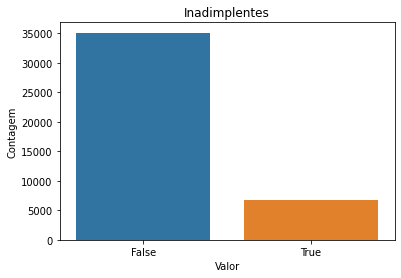

In [13]:
#Proporção de inadimplentes
fig, ax = plt.subplots()
sns.countplot(x='target_default', data=df, ax=ax)
ax.set_title("Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show()
plt.savefig("Default-inadimplentes.jpg")
plt.close()

In [14]:
# balanceamento das classes
print(df.target_default.value_counts());
print("\n True representam {:.2f}% do dataset.".format((df[df.target_default == True].shape[0] / df.shape[0]) * 100))

False    35080
True      6661
Name: target_default, dtype: int64

 True representam 14.80% do dataset.


### Preparação dos Dados

Na etapa anteior pudemos observar algmas características dos dados disponíveis, agora iremos prosseguir com o tratamento e limpeza dos dados.

In [15]:
#cópia de segurança
df_clean = df.copy()

In [16]:
# drop das colunas
limpeza = ['ids', 'target_fraud', 'external_data_provider_credit_checks_last_2_year', 'channel']
df_clean.drop(labels=limpeza, axis=1, inplace=True )

In [17]:
#substituição dos valores infinitos
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)

In [18]:
# substituição do -999
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before']=np.nan

In [19]:
# elminar colunas sem informação aparente ou que demandam mais pesquisa
# mantido a categoria ZIP
drop_var = ['reason', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state']
df_clean.drop(labels=drop_var, axis=1, inplace=True)

In [20]:
#Eliminar entradas NaN no vetor alvo
df_clean.dropna(subset=['target_default'], inplace=True)

Apesar de não haver maiores informações sobre as *features*, podemos assumir como premissa que muitos valores são nulos devido a dois fatores:

1. Há alguns itens que não são obrigatórios durante a etapa de preenchimento dos formulários, como a informação sobre o perfil do cliente no Facebook; e
2. Não existe observação alguma referente à coluna, como é caso das colunas `['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues']`.

De maneira geral, para as variáveis que se enquadram no segundo caso, os valores NaN serão substituidos por zero. Para as variáveis numéricas, será adotado o valor da mediana, e para as categóricas o valor mais frequente.

In [21]:
from sklearn.impute import SimpleImputer

num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

#substituindo valores ausentes
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

In [22]:
# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])


In [23]:
#variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

Vamos verificar se todas as variáveis foram preenchidas corretamente:

In [24]:
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
zip                                                0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                             

Vamos plotar um gráfico de dispersão das vairáveis `Income` e `Limite de Crédito`.

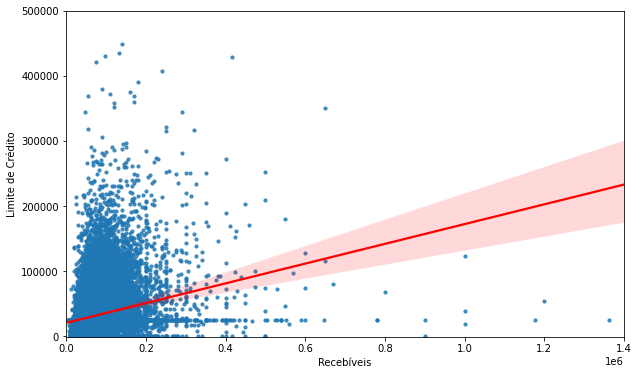

In [25]:
#@title Gráfico de Dispersão
# scatter plot
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(left=-1000,right=1400000)
ax.set_ylim(bottom=-1000,top=500000)
sns.regplot(x='income', y='credit_limit', scatter_kws={"s": 10}, 
            line_kws={"color": "red"}, data=df_clean, ax=ax);
ax.set_ylabel('Limite de Crédito')
ax.set_xlabel('Recebíveis')
ax.plot()
fig.savefig("Default-scatterplot.jpg")

### Normalização dos dados

O próximo passo na preparação dos dados é realizar o `scaling`, ou seja, normalizar os dados

In [26]:
from sklearn.preprocessing import StandardScaler

scaler_df = df_clean.copy()
#normalizar apenas as colunas numéricas
numericas = scaler_df.select_dtypes(exclude='object').columns

scaler_df[numericas] = StandardScaler().fit_transform(scaler_df[numericas].values)


### Categorização dos Dados

No próximo passo iremos realizar o encoder dos dados

In [27]:
#Ecoding o dataset
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

#criando uma cópia do dataset
encoded_df = scaler_df.copy()


# extrair as colunas categóricas
categorias = encoded_df.select_dtypes('object').columns

#armazenando o dicionário de dados
label_dict = defaultdict(LabelEncoder)

#fit do enconder
label = LabelEncoder()

#aplicando o encoder nas colunas categóricas
encoded_df = encoded_df.apply(lambda i: label_dict[i.name].fit_transform(i))

In [28]:
encoded_df.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,state,zip,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,0,0,10,34,29795,10774,33505,39,12371,1,0,20712,1,44,208,1,32,0,0,18,18,444,2,0,52,645,10692
1,0,3,16,36,7340,39340,8934,23,0,0,11066,32199,0,47,710,1,50,0,0,14,14,346,1,0,18,243,863
2,1,3,9,35,20923,14691,37702,28,3412,1,6613,21067,0,32,350,3,32,0,0,10,0,6,2,1,10,65,30604
3,0,0,21,50,28920,41193,12792,31,0,0,14033,22490,0,23,183,3,32,1,0,19,19,406,3,1,39,815,143
4,0,2,1,49,13123,22306,40274,17,0,0,6613,18068,1,47,578,3,32,0,0,11,0,240,2,1,47,320,37108


Com mais esse passo executado todos os dados categóricos do nosso dataset foram convertidos para números.

Podemos checar o nosso dicionário de valores para as categorias que foram convertidas:

In [29]:
label_dict

defaultdict(sklearn.preprocessing._label.LabelEncoder,
            {'application_time_in_funnel': LabelEncoder(),
             'credit_limit': LabelEncoder(),
             'external_data_provider_credit_checks_last_month': LabelEncoder(),
             'external_data_provider_credit_checks_last_year': LabelEncoder(),
             'external_data_provider_email_seen_before': LabelEncoder(),
             'external_data_provider_fraud_score': LabelEncoder(),
             'facebook_profile': LabelEncoder(),
             'income': LabelEncoder(),
             'last_amount_borrowed': LabelEncoder(),
             'last_borrowed_in_months': LabelEncoder(),
             'n_accounts': LabelEncoder(),
             'n_bankruptcies': LabelEncoder(),
             'n_defaulted_loans': LabelEncoder(),
             'n_issues': LabelEncoder(),
             'ok_since': LabelEncoder(),
             'real_state': LabelEncoder(),
             'reported_income': LabelEncoder(),
             'risk_rate': LabelE

Fizemos um grande trabalho para limpeza e organização dos dados, vamos plotar alguns histogramas para verificarmos como estão as distribuições dos dados.

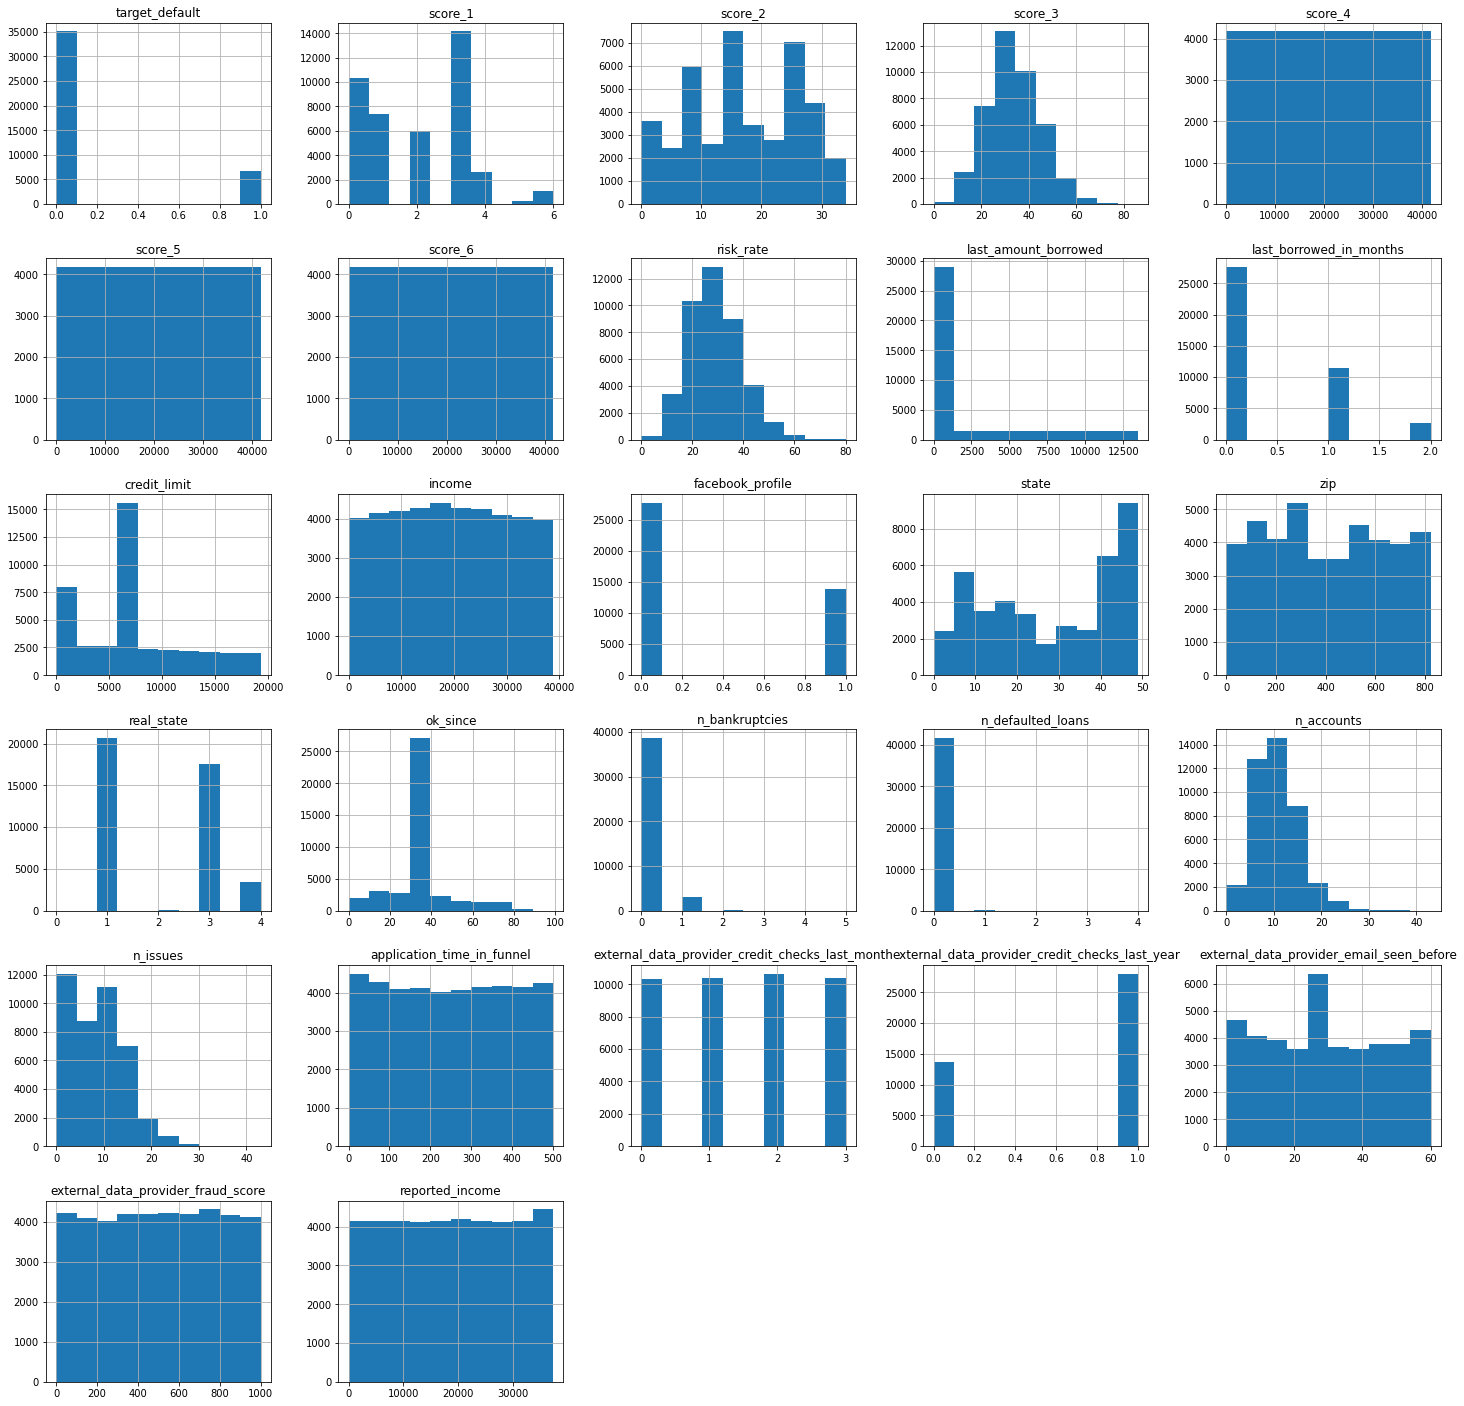

In [30]:
#@title Histogramas de Distribuição
# plotting histogramas
sns_plot = encoded_df.hist(figsize=(25,25));
sns.set()

Antes de iniciarmos nossos modelos de Machine Learning vamos plotar e verificar a correlação entre as variáveis, se nos trazem mais algum *insight* sobre os dados

In [31]:
#obtendo variáveis numéricas
df_numerico = df_clean.select_dtypes(exclude='object')

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 
Computing correlation


<Figure size 864x576 with 0 Axes>

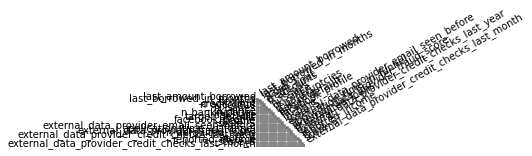

In [32]:
from biokit.viz import corrplot
c = corrplot.Corrplot(df_numerico)
fig = plt.figure(figsize=(12, 8))
#plt.rcParams['figure.dpi'] = 120
#plt.rcParams['figure.figsize'] = (8,6)
c.plot(colorbar=False, method='circle', cmap='jet', shrink=.5, rotation=30, lower='circle')


Do gráfico anteior podemos observar que a correlação entre as variáveis do dataset e a variável alvo são muito fracas.

Um dado chama atenção que é a correlação entre o perfil do facebook e o rsico de default do cliente (não era esperado).

Podemos observar ainda por um outro ângulo a correlação entre as variáveis:

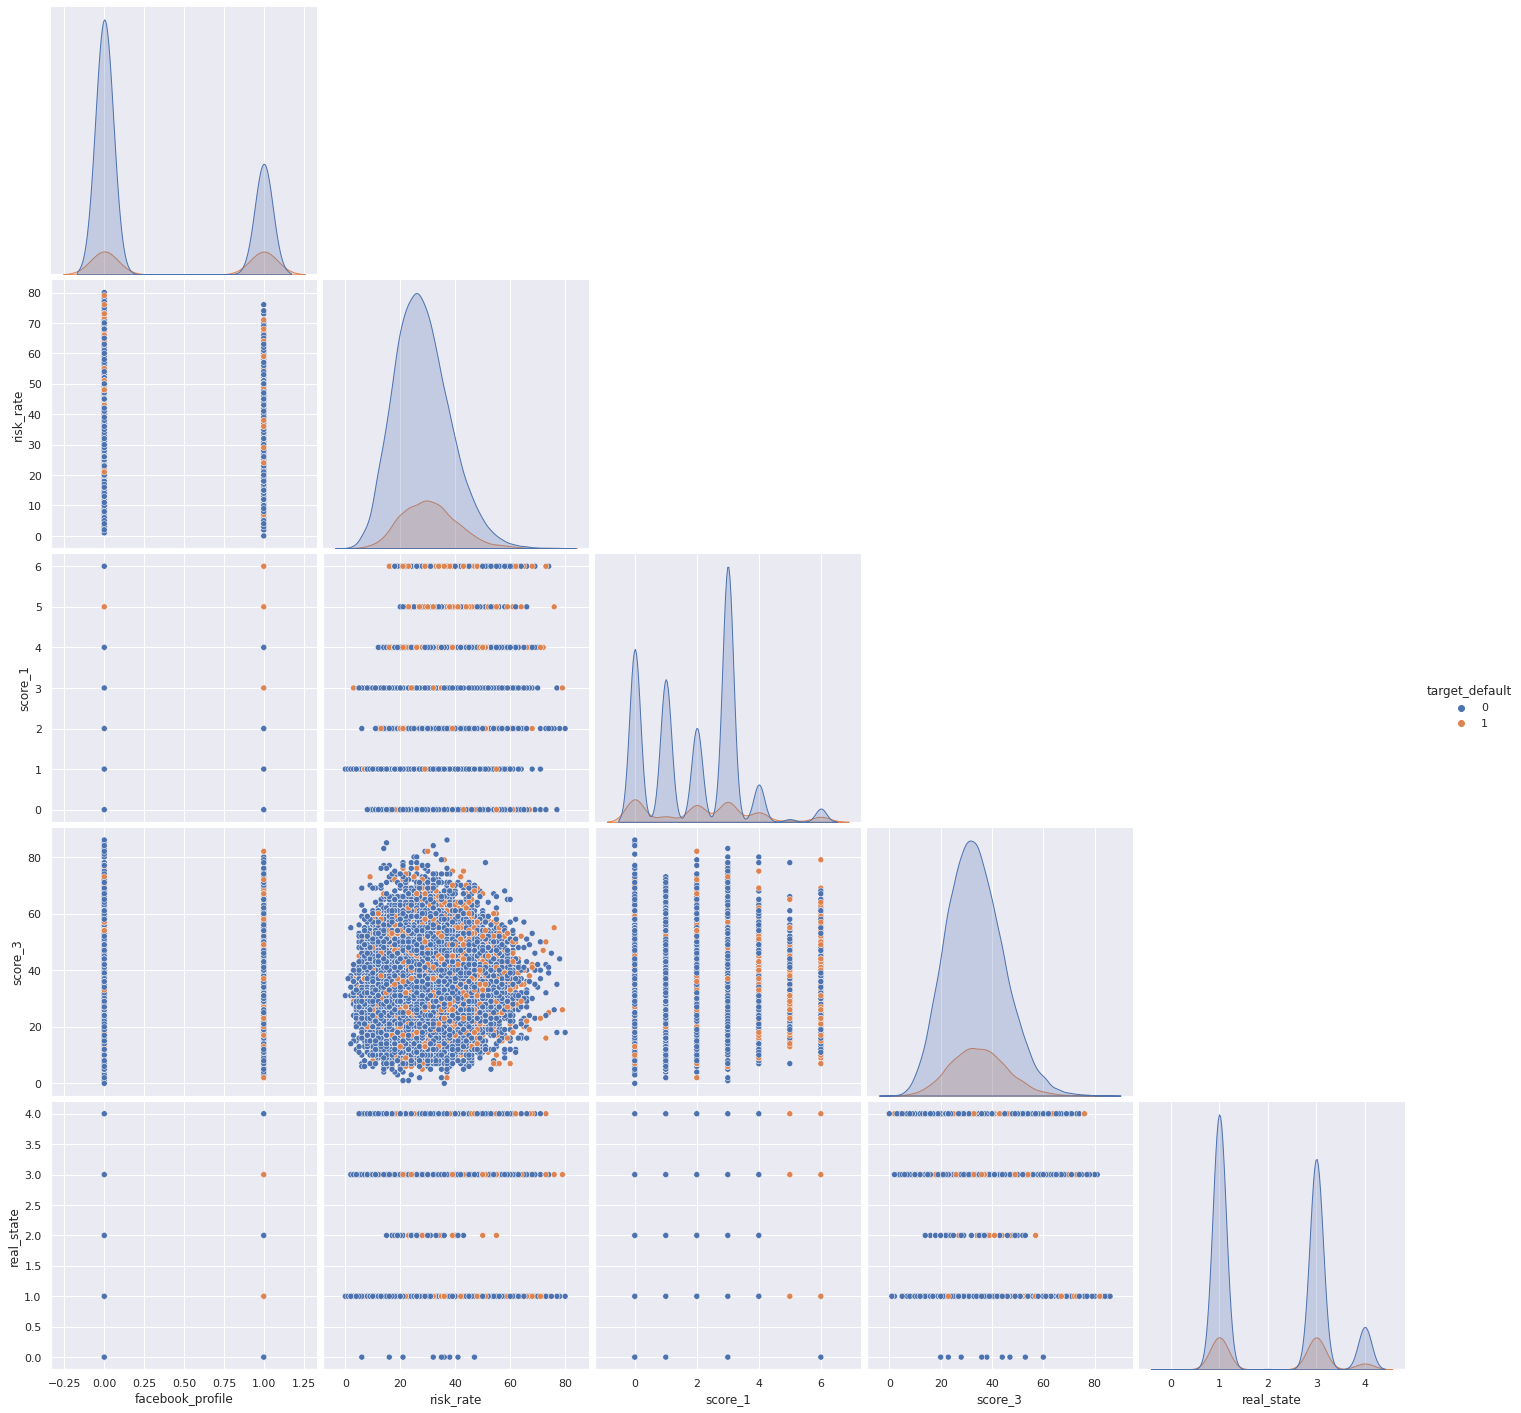

In [33]:
#@title Gráfico de Pares
# pairplot
plt.close()
sns.set()
cols = ['target_default', 'facebook_profile', 'risk_rate', 'score_1', 'score_3', 'real_state'];
sns.color_palette("crest", as_cmap=True)
sns.pairplot(encoded_df[cols], height = 4,  hue="target_default", corner=True);
plt.show();
plt.savefig("Default-pairplot.jpg")
plt.close()

Depois de rever nossas distribuições, correlações e vizualisá-las agruapadas, vamos rever alguns *insights*:

- Correlações fracas entre as variável alvo e outras variáveis disponível.

- Variáveis ​​inesperadas como as mais correlacionadas.

- O número de empréstimos anteriores inadimplentes influencia fortemente o limite de crédito.

- Renda mais alta não significa necessariamente limite de crédito mais alto.

# Modelos de Machine Learning

## Ensemble

Por que usar apenas um modelo de machine learning, por que apenas uma forma de fazer previsão? Imagine que você poderia aproveitar o melhor de cada mundo, usar os pontos fortes de cada estimador e até mesmo combiná-los.

Você entenderá a importância do método de `Ensemble` ao entrar no [universo do Machine Learning](https://sigmoidal.ai/como-salvar-seu-modelo-de-machine-learning/) e ficar perdido com a quantidade de modelos diferentes que temos a disposição. Temos regressão linear, polinomial e logística, gradiente descendente, [XGBoost](https://sigmoidal.ai/xgboost-aprenda-algoritmo-de-machine-learning-em-python/), máquina de vetores de suporte, naive bayes, árvores de decisão, Random Forest, entre outros.

Observe abaixo o resultado do classificador de votação para os diferentes modelos. No caso, o VotingClassifier fez a combinação dos modelos.

A documentação original sobre a metodologia pode ser consultada neste [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html).

In [34]:
#1. Dividindo entre teste e treino
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Após a divisão entre treino e teste vamos verificar se as dimensões são equivalentes

In [35]:
print(X_train.shape ,y_train.shape, X_test.shape, y_test.shape)

(33392, 26) (33392,) (8349, 26) (8349,)


In [36]:
#importando bibliotecas necessárias
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report


#2. Instanciando os modelos
model_xgbc = XGBClassifier()
model_sgd = SGDClassifier()
model_svc = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
voting_clf = VotingClassifier(estimators=[('xgbc', model_xgbc), ('sgd', model_sgd), ('svc', model_svc),
                                          ('dt', model_dt), ('rf', model_rf)],
                              n_jobs=-1 , voting='hard')

#3. os dados já foram separados anteriormente

#4. Fit do modelo
for model in (model_xgbc, model_sgd, model_svc, model_dt, model_rf, voting_clf):
  model.fit(X_train, y_train)

#5. Fazendo previsões em cima do modelo treinado
model = []
accuracy = []
roc_score = []
for clf in (model_xgbc, model_sgd, model_svc, model_dt, model_rf, voting_clf):
  y_pred = clf.predict(X_test)
  model.append(clf.__class__.__name__)
  accuracy.append(accuracy_score(y_test,y_pred))

#6. Verificando resultados
col = ['Acurácia']
resultado = pd.DataFrame(data=accuracy, index=model, columns=col)
resultado


,Acurácia
XGBClassifier,0.848365
SGDClassifier,0.161576
SVC,0.848605
DecisionTreeClassifier,0.748233
RandomForestClassifier,0.849443
VotingClassifier,0.849203


Do modelo `Decision Tree` podemos aferir quais variáveis (*features*) tiveram mais peso para o modelo.

In [37]:
predictors = X_train.columns
predictors

Index(['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months',
       'credit_limit', 'income', 'facebook_profile', 'state', 'zip',
       'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans',
       'n_accounts', 'n_issues', 'application_time_in_funnel',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score', 'reported_income'],
      dtype='object')

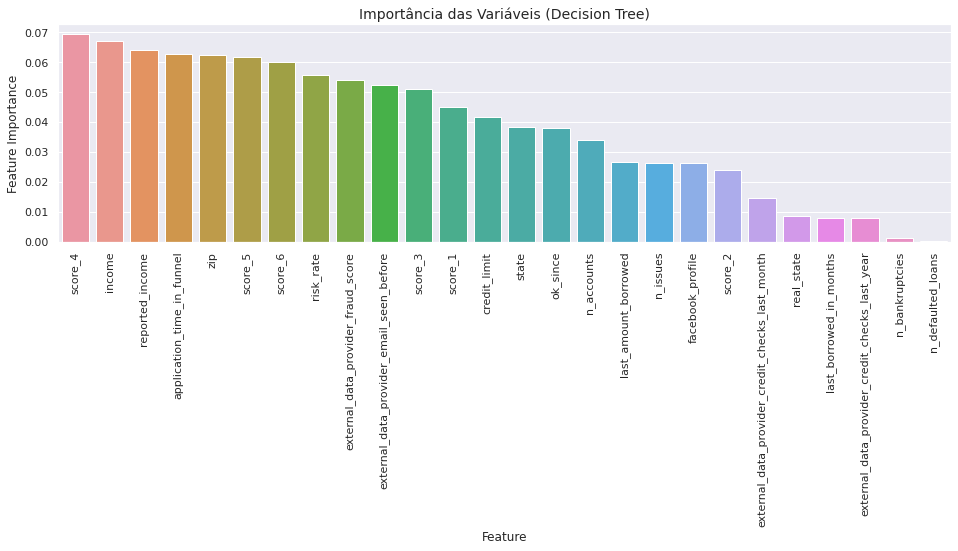

In [38]:
#@RandomForest Feature Importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature Importance': model_rf.feature_importances_})
tmp = tmp.sort_values(by='Feature Importance', ascending=False)
plt.figure(figsize=(16,4))
plt.title('Importância das Variáveis (RandomForest)', fontsize=14)
s = sns.barplot(x='Feature', y='Feature Importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();
plt.savefig("Default-feature_importance.jpg")
plt.close()

## XGboost

do método `Ensemble` podemos observar que o XGBoost apresentou melhor acurácia, portanto iremos utilizá-los nos próximos passos para ajustes do hyperparâmetro.

In [39]:
# Aplicando Validação Cruzada com K-Fold
from sklearn.model_selection import cross_val_score
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1)
print("Scores = ", scores)
print("ROC_AUC = {:.3%}\n". format(scores.mean()))

#4. Fit do modelo
xgb.fit(X_train, y_train, eval_metric='auc')

Scores =  [0.73510714 0.71691534 0.70311158 0.7189564  0.71334018 0.71802231
 0.72560504 0.69945285 0.72013748 0.72790018]
ROC_AUC = 71.785%



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [40]:
#5. Fazer previsões em cima do modelo gerado
y_pred_xgb = xgb.predict(X_test)

In [41]:
# Checando a performance do modelo
# classification report
print('Classification Report:\n', classification_report(y_test,y_pred_xgb, digits=4))

# accuracy
print('Accuracy Score:\t {:.4f}\n'.format(accuracy_score(y_test,y_pred_xgb)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred_xgb)))


Classification Report:
               precision    recall  f1-score   support

           0     0.8531    0.9928    0.9177      7085
           1     0.5096    0.0419    0.0775      1264

    accuracy                         0.8488      8349
   macro avg     0.6814    0.5174    0.4976      8349
weighted avg     0.8011    0.8488    0.7905      8349

Accuracy Score:	 0.8488

ROC_AUC:	 0.5174



### Relatório de desempenho
A princípio 84% de precisão parece bom o suficiente.

No entanto, quando analisamos mais detalhadamente os resultados, podemos ver que nosso modelo falhou terrivelmente ao identificar clientes que não iriam cumprir com suas obrigações financeiras com o banco.

Nossa pontuação ROC_AUC também funciona um pouco acima da linha de 50%. O que definitivamente não é bom.

Isso significa que temos que encontrar maneiras de melhorar nosso modelo e evitar falsos positivos, mas o mais importante neste momento, identificar os verdadeiros positivos.


#### Importância das Variáveis

Para auxiliar na avaliação do modelo, podemos ainda  verificar quais variáveis tiveram mais importância para o modelo que acabamos de criar.

No próximo passo iremos plotar quais variáveis (`features`) tiveram mais importância para o modelo XGBoost.

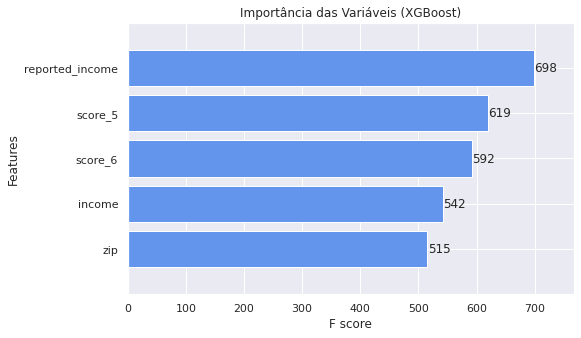

In [42]:
#@XGBoost Feature Importance
from xgboost import plot_importance
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
plot_importance(xgb, height=0.8, max_num_features=5, title="Importância das Variáveis (XGBoost)", ax=ax, color='cornflowerblue') 
plt.show()
plt.savefig("Default-variaveis-XGB.jpg")
plt.close()

#### Curva ROC

Podemos verificar o desempenho do nosso modelo também pela curva ROC.

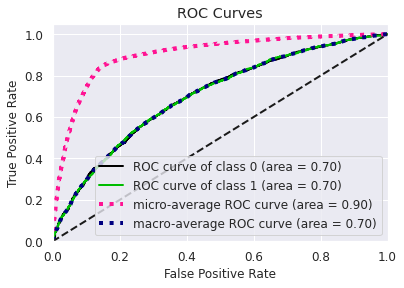

In [43]:
#@ Curva ROC do Modelo
#gerando probabilidades
y_pred_xgb = xgb.predict_proba(X_test)

#plotando o gráfico
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_pred_xgb)
plt.show()

## Scikit-Optimize

Scikit-Optimize é uma biblioteca Python de código aberto que fornece uma implementação de `Otimização Bayesiana` que pode ser usada para ajustar os hiperparâmetros de modelos de machine learning da biblioteca Python scikit-Learn.

Em contraste com GridSearchCV, nem todos os valores de parâmetro são testados, mas em vez disso, um número fixo de configurações de parâmetros é amostrado a partir do especificado distribuições. A abordagem bayesiana rastreia os resultados de avaliação anteriores que são usados ​​para formar um modelo probabilístico que mapeia hiperparâmetros para as probabilidades de pontuação da função objetivo.

O `Bayes Search` é a automação para *tunning* dos hiper parâmetros. É uma biblioteca relativamente nova que está em desenvolvimento e que facilita a nossa busca no refinamento dos hiper parâmetros.

In [44]:
# 1. importar as bibliotecas necessárias
import skopt
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

#2. Definir intervalos de otimziação
bayes = BayesSearchCV(
    estimator = XGBClassifier(
        n_jobs = 1,
        eval_metric = 'auc',
        silent=1,
        tree_method='exact',
        booster='gbtree',
        objective='binary:logistic',
        sampling_method='uniform'
    ),
    #2.1 Definindo intervalos de otimização
    search_spaces = {
        'learning_rate': (0.00001, 1.0, 'log-uniform'),
        'max_depth': (2, 20),
        'max_delta_step': (0, 20),
        'reg_alpha': (.001, 15.0), 
        'reg_lambda': (.001, 15.0),
        'subsample': (0.01, 1.0, 'uniform'),
        'gamma': (1e-5, 0.5, 'log-uniform'),
        'n_estimators': (50, 500),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },   
    #2. definindo método de avaliação
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=10,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 6,   
    verbose = 0,
    refit = True,
    random_state = 42
)

# callback handler
def status_print_bayes(optim_result):
    bayes_resultado = bayes.best_score_
    print("Melhor resultado: %s", np.round(bayes_resultado,4))
    if bayes_resultado >= 0.98:
        print('Suficiente!')
        return True

Conforme explanado no [post](https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/) elaborado por Jason Brownlee para classificação de modelos desbalanceados, estamos tratando de um modelo de probabilidades, onde ambas as classes são importantes:

<center><img alt="Imbalanced Classification Binary" width="50%" src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/12/How-to-Choose-a-Metric-for-Imbalanced-Classification-latest.png"></center>

Por esse motivo defini a métrica ROC AUC para verificar o desempenho do modelo otimizado.

Ainda da [documentação oficial](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html#handle-imbalanced-dataset) do XGBoost há indicação de utilização da métrica AUC para dataset desbalanceados, entre outras medidas.

In [45]:
%%time
#4. Fit no modelo
otmizador = bayes.fit(X_train, y_train, callback=status_print_bayes)

Melhor resultado: %s 0.6513
Melhor resultado: %s 0.6513
Melhor resultado: %s 0.6513
Melhor resultado: %s 0.6513
Melhor resultado: %s 0.6513
Melhor resultado: %s 0.6513
CPU times: user 36.2 s, sys: 197 ms, total: 36.4 s
Wall time: 41min 53s


In [46]:
print("Melhor ROC_AUC: {:.3%} para {}".format(bayes.best_score_, bayes.best_params_))

Melhor ROC_AUC: 65.129% para OrderedDict([('gamma', 0.0008454077043454856), ('learning_rate', 0.043513970791520494), ('max_delta_step', 19), ('max_depth', 8), ('n_estimators', 352), ('reg_alpha', 6.212365368650592), ('reg_lambda', 5.2646190921522615), ('scale_pos_weight', 370), ('subsample', 0.31141867792614114)])


### Varição dos Hyper Parâmetros
Vamos plotar um gráfico para verificarmos como os hyper parâmeros variaram com o aprendizado do modelo que estamos otimizando.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1a848a470>,
      dtype=object)

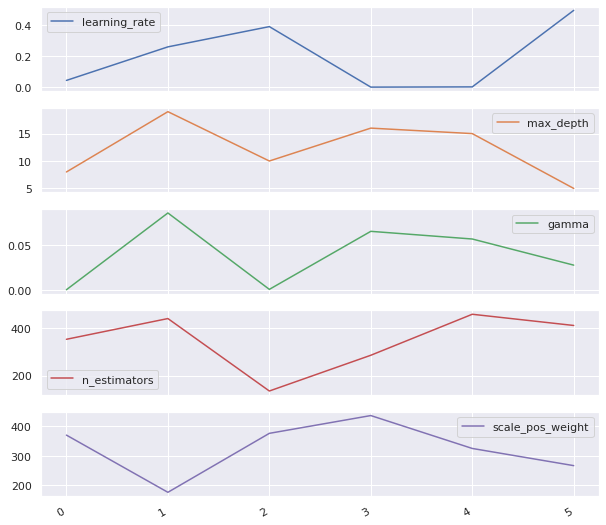

In [47]:
bayes_results_df = pd.DataFrame(np.transpose([
                                              np.array(bayes.cv_results_['param_learning_rate']).data,
                                              np.array(bayes.cv_results_['param_max_depth']).data,
                                              np.array(bayes.cv_results_['param_gamma']).data,
                                              np.array(bayes.cv_results_['param_n_estimators']).data,
                                              np.array(bayes.cv_results_['param_scale_pos_weight']).data]),
                                              columns=['learning_rate', 'max_depth', 'gamma', 'n_estimators', 'scale_pos_weight'])
bayes_results_df.plot(subplots=True,figsize=(10, 10))

## Modelo Otimizado

Após executarmos a otimização dos hiper parâmetros, iremos elaborar o modelo final com base nos dados obtidos nos passos anteiores.

In [48]:
otimizado = XGBClassifier(**bayes.best_params_)

score_otimizado = cross_val_score(otimizado, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print("Scores = ", score_otimizado)
print("ROC_AUC = {:.3%}\n". format(score_otimizado.mean()))

#4. Fit do modelo
otimizado.fit(X_train, y_train, eval_metric='auc')

#5. Fazer previsões em cima do modelo gerado
y_pred_otimizado = otimizado.predict(X_test)

Scores =  [0.65643757 0.65374447 0.647274   0.63941752 0.65938807]
ROC_AUC = 65.125%



### Relatório de Desempenho

No passo anteior vimos que o nosso resultado ROC_AUC ficou apresentou certa perda de eficiência, vamos utilizar das demais métricas para verificarmos como nosso modelo otimizado se comportou.

In [49]:
# Checando a performance do modelo
# classification report
print('Classification Report:\n', classification_report(y_test, y_pred_otimizado, digits=4))

# acurácia
print('Accuracy Score:\t {:.4f}\n'.format(accuracy_score(y_test, y_pred_otimizado)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred_otimizado)))

Classification Report:
               precision    recall  f1-score   support

           0     0.9351    0.1159    0.2062      7085
           1     0.1616    0.9549    0.2764      1264

    accuracy                         0.2429      8349
   macro avg     0.5483    0.5354    0.2413      8349
weighted avg     0.8180    0.2429    0.2168      8349

Accuracy Score:	 0.2429

ROC_AUC:	 0.5354



In [50]:
# gerando probabilidades do modelo
y_pred_otimizado_prob = otimizado.predict_proba(X_test)

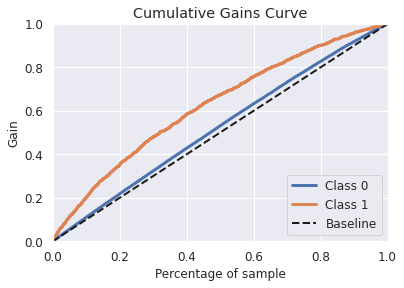

In [51]:
#plotando curva de ganho acumulado
skplt.metrics.plot_cumulative_gain(y_test, y_pred_otimizado_prob)
plt.show()


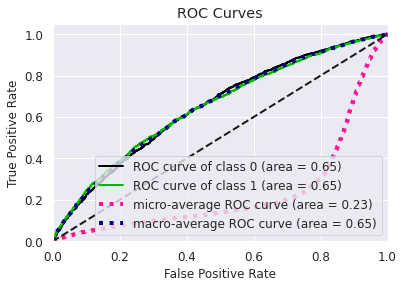

In [52]:
#Plotando curva ROC do modelo
skplt.metrics.plot_roc(y_test, y_pred_otimizado_prob)
plt.show()

Podemos  perceber o **overfitting** do nosso modelo, obteve um resultado melhor durante o treinamento do que a previsão dos valores (praticamente decorou os resultados) ou mesmo se compararmos com os resultados iniciais sem ajustes observamos que perdemos eficiência. O modelo otimizado é muito bom em prever quando não ocorrerá o `default`, porém o nível de acerto para 1 está extremaente baixo.


O modelo XGB é mais sensível a overfitting se os dados apresentarem ruído e o treinamento geralmente leva mais tempo devido ao fato de que as árvores são construídas sequencialmente. 
*GradientBoostMethods* são difíceis de ajustar, pois normalmente existem três parâmetros: número de árvores, profundidade das árvores e taxa de aprendizagem sendo que cada árvore construída é geralmente rasa.

# Redes Neurais

Podemos ainda elaborar um modelo de redes neurais para prever o risco de `default` de uma cliente, vejamos como o modelo se comportará:

Primeiramente iremos importar as bibliotecas necessárias

In [53]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization

A seguir iremos redimensionar nossos dados de treino e teste para compatibilizar com a API do Keras

In [54]:
X_train_keras = np.array(X_train)
X_test_keras = np.array(X_test)
y_train_keras = np.array(y_train)
y_test_keras = np.array(y_test)

In [55]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_keras)
X_test_scaled = scaler.transform(X_test_keras)

In [56]:
X_train_scaled.shape

(33392, 26)

Nesta etapa vamos preparar um modelo de redes neurais com 5 camadas, sendo que na primeira camada e na terceira camada teremos 80 neurons e na quinta camada 40 neurons.

In [57]:
n_entradas = X_train_scaled.shape[1]
#1. Definindo o modelo e hyper parâmetros
keras_model = Sequential([
         Dense(80, input_shape=(n_entradas, ), activation='relu'),
         Dropout(0.2),
         Dense(80, activation='relu'),
         Dropout(0.2),
         Dense(40, activation='relu'),
         BatchNormalization(),
         Dense(1, activation='sigmoid')                 
])

Vou deixar aqui uma breve explanação sobre cada função de ativação utilizada.

`ReLu` é a função de ativação amplamente utilizada ao projetar redes neurais. Por se tratar de uma função *não linear* podemos facilmente copiar os erros para trás e ter várias camadas de neurônios ativadas.

A principal vantagem sobre é função `ReLu` sobre as outras funções de ativação é que ela não ativa todos os neurônios ao mesmo tempo, gerando eficiência na utilização dos recursos.

Já a função `sigmoid` converte todos as variáveis reais em probabilidades categóricas. Os elementos do vetor alvo estão no intervalo de 0 a 1 e a somatória é 1. 

Normalmente utilizado na última camada de ativação pois o resultado pode ser interpretado como uma distribuição probabilística.

In [58]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                2160      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4

Podemos ainda plotar o sumário:

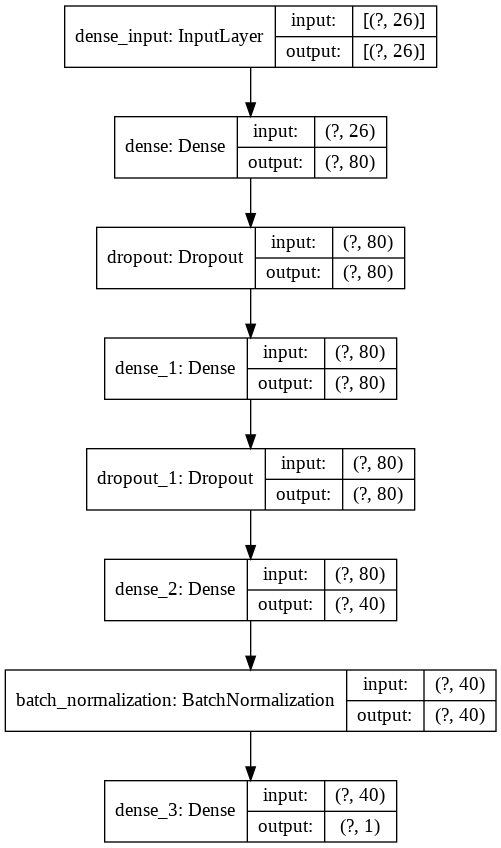

In [59]:
from keras.utils.vis_utils import plot_model
plot_model(keras_model, show_shapes=True, show_layer_names=True)

## Compilando e Treinando o modelo

In [60]:
#2. Instanciando o modelo
keras_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['AUC'])

In [61]:
%%time
#3. Fit do modelo
keras_model.fit(X_train_scaled, y_train_keras, validation_split=0.2, batch_size=25, epochs=150, shuffle=True, verbose=2)

Epoch 1/50
1069/1069 - 3s - loss: 1.9350e-08 - auc: 0.4816 - val_loss: 1.8937e-08 - val_auc: 0.4797
Epoch 2/50
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.4858 - val_loss: 1.8937e-08 - val_auc: 0.4810
Epoch 3/50
1069/1069 - 3s - loss: 1.9350e-08 - auc: 0.4927 - val_loss: 1.8937e-08 - val_auc: 0.4798
Epoch 4/50
1069/1069 - 3s - loss: 1.9350e-08 - auc: 0.4786 - val_loss: 1.8937e-08 - val_auc: 0.4802
Epoch 5/50
1069/1069 - 3s - loss: 1.9350e-08 - auc: 0.4819 - val_loss: 1.8937e-08 - val_auc: 0.4797
Epoch 6/50
1069/1069 - 3s - loss: 1.9350e-08 - auc: 0.4890 - val_loss: 1.8937e-08 - val_auc: 0.4795
Epoch 7/50
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.4759 - val_loss: 1.8937e-08 - val_auc: 0.4793
Epoch 8/50
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.4846 - val_loss: 1.8937e-08 - val_auc: 0.4808
Epoch 9/50
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.4895 - val_loss: 1.8937e-08 - val_auc: 0.4796
Epoch 10/50
1069/1069 - 2s - loss: 1.9350e-08 - auc: 0.4813 - val_loss: 1.8937e-08 - val_auc: 0.4794

In [62]:
#4. Previsões com o modelo
#keras_pred = keras_model.predict(X_train, batch_size=200, verbose=0)
keras_pred = keras_model.predict_classes(X_test_scaled, batch_size=200, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


## Avaliando o Desempenho

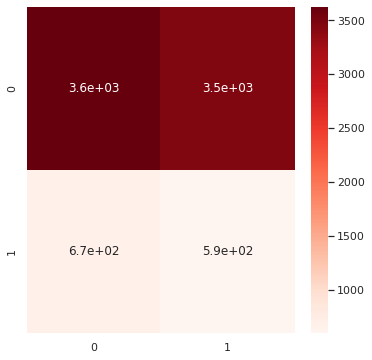

In [63]:
#5. Avaliando o modelo
keras_cm = confusion_matrix(y_test_keras, keras_pred)

fig, ax2 = plt.subplots(figsize=(6,6))
sns.heatmap(keras_cm, ax=ax2, annot=True, cmap=plt.cm.Reds)
ax2.set_title = ("Random UnderSample (RUS) \n Confusion Matrix")
ax2.set_ylabel = ("Verdadeiros")
ax2.set_xlabel = ("Positivos")
plt.show()

In [64]:
print("A acurácia do modelo utilizando TensorFlow é de: {:%}" .format(keras_pred[0][0]))

A acurácia do modelo utilizando TensorFlow é de: 0.000000%


In [65]:
TN, FP, FN, TP = confusion_matrix(y_test, keras_pred.round()).ravel() 
TN, FP, FN, TP

(3624, 3461, 671, 593)

In [66]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
#Sensibilidade, Recall, Taxa de Acerto ou Taxa de Verdadeiros positivos
sensibilidade = TP/(TP+FN)
sensibilidade

0.46914556962025317

In [67]:
#Precision or Positive Predictive Value (PPV)
#Precisão ou Valor Preditivo Positivo 
precisao = TP/ (TP+FP)
precisao

0.14627528367044895

In [68]:
#F1 score( harmonic mean of precision and sensitivity(recall)
#F1 score (média harmônica de precisão e sensibilidade)
F1= 2/ ((1/precisao) + (1/sensibilidade))
F1

0.2230161714930425

In [69]:
#(ROC AUC) - Área sobre a curva ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, keras_pred )

0.4903243726718062

# Conclusão

Podemos observar que mesmo tratando nosso dataset, eliminando outliers e valores ausentes e com dados normalizados não se trata de um problema trivial. Além disso, nossos dados de amostra se mostraram insuficientes, pois nosso modelo não consegue detectar corretamente muitos casos de `default` e, em vez disso, classifica incorretamente casos onde não ocorreriam. Característica de um datasete desbalanceado. 

Imagine que um modelo deste poderia elevar em muito as provisões utilizadas pelo banco para cobrir casos em que o cliente não cumpre com suas obrigações financeiras, elevando assim o custo de capital da instituição patrocinadora **Nubank** e consequentemente a taxa de juros a ser cobrada em cada empréstimo do cliente final. 

Ainda há muito espaço para otimizações dos modelo, ajustes dos hiper parâmetros e campos para estudos.

Grandes empresas de crédito implementam áreas robustas para estudar modelos e ajustá-los conforme crescimento da base de dados. Esse é um campo muito fértil e financeiramente viável de estudos relacionados a Data Science e Machine Learning.


---

Esse notebook faz parte da trilha de conhecimento do curso:
# **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

Para saber mais clique no [link](https://cursos.sigmoidal.ai/) 


<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

---